In [1]:
from data import train_df, test_df
import numpy as np
import pandas as pd

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
train_df.describe()

/Users/bonifacio/.pyenv/versions/3.4.4/envs/ml-kit/lib/python3.4/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*Remover entradas que possuem NaN reduz bastante o tamanho do dataset*

In [4]:
train_df.dropna().describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


## Análise inicial

In [5]:
# pra ver quantas pessoas sobreviveram
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
# pra ver os percentuais de quem sobreviveu
train_df["Survived"].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [7]:
# quantos homens sobreviveram
train_df["Survived"][train_df["Sex"] == 'male'].value_counts(normalize=True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [8]:
# quantas mulheres sobreviveram
train_df["Survived"][train_df["Sex"] == 'female'].value_counts(normalize=True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

Proporcionalmente, um número maior de mulheres sobreviveram. Seria por causa da política de "mulheres e crianças primeiro"?

In [9]:
# Existe o campo "Child"?
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [2]:
# Completando os valores em branco para a mediana da feature "Age".
# Usamos mediana ao invés de média por ela ser menos sensível a outliers (i.e., a mediana é uma estatística robusta).
train_df['Age'] = train_df["Age"].fillna(train_df["Age"].median())
train_df["Child"] = 0
children = train_df["Age"] < 18
train_df.loc[children, "Child"] = 1
train_df["Survived"][train_df["Child"] == 0].value_counts(normalize=True)

0    0.638817
1    0.361183
Name: Survived, dtype: float64

In [3]:
# A feature 'Sex' precisa ser mapeada para inteiros
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

In [4]:
from sklearn import tree

In [13]:
# Vamos usar então as features 'Sex' e 'Child' para uma classificacao inicial

# Separando o resultado e as features usadas
target = train_df['Survived'].values
initial_features = train_df[['Sex', 'Child']].values

# Da classifier
my_tree_one = tree.DecisionTreeClassifier().fit(initial_features, target)

# Vamos checar a importância relativa de cada feature e o score obtido no conjunto de treinamento
print(my_tree_one.feature_importances_)
print(my_tree_one.score(initial_features, target))

[ 0.95466315  0.04533685]
0.786756453423


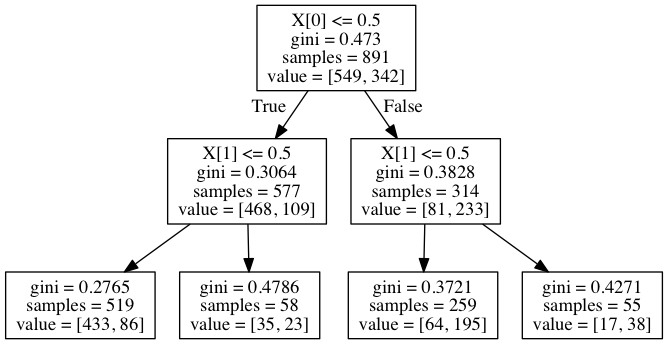

In [14]:
import pydotplus as pydot
from sklearn.externals.six import StringIO
from IPython.display import Image 
dotfile = StringIO()
tree.export_graphviz(my_tree_one, out_file=dotfile)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())

A árvore de decisão funciona aplicando as decisões de cada nível ao exemplo passado como entrada. Ao se chegar a uma folha, a árvore checa o que aconteceu com a maioria dos exemplos que possuem aquelas características: se a maioria tiver sobrevivido, a árvore decide que o novo exemplo também deve ter sobrevivido. TODO: observações sobre o efeito de permutação de features na árvore resultante.

In [15]:
# Por exemplo, existem 55 crianças do sexo feminino no conjunto de treinamento. A maioria delas sobreviveram,
# o que pode ser visto na filtragem abaixo...
temp = train_df[train_df['Child'] == 1]
female_children = temp[temp['Sex'] == 1]
female_children.groupby('Survived').describe()

Age  Child        Fare      Parch  PassengerId  \
Survived                                                               
0        count  17.000000   17.0   17.000000  17.000000    17.000000   
         mean    8.441176    1.0   31.911765   1.411765   349.176471   
         std     5.061751    0.0   32.402672   0.795206   278.293064   
         min     2.000000    1.0    7.854200   0.000000    15.000000   
         25%     3.000000    1.0   15.245800   1.000000   115.000000   
         50%     9.000000    1.0   27.900000   2.000000   298.000000   
         75%    11.000000    1.0   31.275000   2.000000   543.000000   
         max    17.000000    1.0  151.550000   2.000000   853.000000   
1        count  38.000000   38.0   38.000000  38.000000    38.000000   
         mean    9.592105    1.0   33.172261   0.868421   416.342105   
         std     6.159595    0.0   39.725627   0.777072   279.844482   
         min     0.750000    1.0    7.225000   0.000000    10.000000   
         25%     4.000000    1.0   12.071875   0.000000   176.000000   
         50%    10.500000    1.0   19.379150   1.000000   441.500000   
         75%    15.750000    1.0   32.596875   1.000000   678.750000   
         max    17.000000    1.0  211.337500   2.000000   876.000000   

                   Pclass   Sex      SibSp  
Survived                                    
0        count  17.000000  17.0  17.000000  
         mean    2.882353   1.0   2.235294  
         std     0.485071   0.0   1.714986  
         min     1.000000   1.0   0.000000  
         25%     3.000000   1.0   1.000000  
         50%     3.000000   1.0   3.000000  
         75%     3.000000   1.0   4.000000  
         max     3.000000   1.0   5.000000  
1        count  38.000000  38.0  38.000000  
         mean    2.315789   1.0   0.736842  
         std     0.774780   0.0   1.031509  
         min     1.000000   1.0   0.000000  
         25%     2.000000   1.0   0.000000  
         50%     2.500000   1.0   0.000000  
         75%     3.000000   1.0   1.000000  
         max     3.000000   1.0   4.000000

In [5]:
# Vamos definir algumas constantes para ajudar com a legibilidade dos dados.
DIED = 0
SURVIVED = 1

MALE = 0
FEMALE = 1    

In [17]:
# ...Logo, ao se passar para a árvore um exemplo consistindo de uma
# criança do sexo feminino, a árvore decidirá que ela deve ter sobrevivido.
new_female_child = pd.DataFrame(data=[[FEMALE, 1]], columns=['Gender', 'Child'])
prediction = my_tree_one.predict(new_female_child)

if (prediction[0] == SURVIVED):
    print('Survived :D')
else:
    print('Died :(')

Survived :D


In [6]:
def encode_gender_and_child(input_dataframe):
    encoded_dataframe = input_dataframe.copy()
    
    encoded_dataframe['Sex'] = encoded_dataframe['Sex'].map({'male': MALE, 'female': FEMALE})
    
    encoded_dataframe['Age'] = encoded_dataframe["Age"].fillna(encoded_dataframe["Age"].median())
    encoded_dataframe["Child"] = 0
    children = encoded_dataframe["Age"] < 18
    encoded_dataframe.loc[children, "Child"] = 1
    
    return encoded_dataframe.drop('Age', 1)

def extract_features_from_dataframe(dataframe, feature_names):
    return dataframe.ix[:, feature_names]

In [19]:
test_features_df = extract_features_from_dataframe(test_df, ['Sex', 'Age'])
encoded_test_df = encode_gender_and_child(test_features_df)

test_targets = my_tree_one.predict(encoded_test_df.values)

In [20]:
test_results_csv = extract_features_from_dataframe(test_df, ['PassengerId'])
test_results_csv['Survived'] = test_targets
test_results_csv.to_csv('./data/first_attempt.csv', index=False)

#### Com esse conjunto de dados a gente já consegue prever sobrevivência com uma precisão de 0.76555 no conjunto de dados usado para avaliar as submissões do Kaggle.

## Inclusão das features "Cabin" e "Fare"

In [21]:
cabin_fare_df = train_df.ix[:, ['Cabin', 'Fare']]
cabin_fare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
Cabin    204 non-null object
Fare     891 non-null float64
dtypes: float64(1), object(1)
memory usage: 14.0+ KB


In [22]:
len(cabin_fare_df['Cabin'].unique())

148

A feature "Cabin" é categórica com um range relativamente grande(148 valores diferentes) e várias entradas vazias. Não é adequado codificar essa feature como uma sequência numérica pois isso implicaria uma ordenação dos valores, o que não condiz com a semântica dessa feature e poderia levar a resultados incoerentes. Essa feature será ignorada nesse momento e analisada por último como uma possível inclusão de informação para melhora do resultado final.

In [7]:
def get_tree_for_features(features):
    target = train_df['Survived'].values
    feature_values = train_df[features].values
    
    # Da classifier
    return (tree.DecisionTreeClassifier().fit(feature_values, target), feature_values, target)

In [24]:
features = ['Sex', 'Child', 'Fare']
third_tree, feature_values, target = get_tree_for_features(features)

# Score obtido no dataset de treinamento
third_tree.score(feature_values, target)

0.9135802469135802

Temos uma árvore treinada agora com as features *Sex*, *Child* e *Fare*. Vamos gerar as previsões para o dataset de testes.

In [25]:
test_features_df = extract_features_from_dataframe(test_df, ['Sex', 'Age', 'Fare'])
# O final da linha abaixo garante que as colunas estarão na ordem correta
encoded_test_df = encode_gender_and_child(test_features_df)[features]

encoded_test_df['Fare'] = encoded_test_df['Fare'].fillna(encoded_test_df['Fare'].median())
encoded_test_df.describe()

,Sex,Child,Fare
count,418.000000,418.000000,418.000000
mean,0.363636,0.098086,35.576535
std,0.481622,0.297787,55.850103
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.895800
50%,0.000000,0.000000,14.454200
75%,1.000000,0.000000,31.471875
max,1.000000,1.000000,512.329200


In [26]:
test_features = encoded_test_df.values
predictions = third_tree.predict(test_features)

In [27]:
test_results_csv = extract_features_from_dataframe(test_df, ['PassengerId'])
test_results_csv['Survived'] = predictions
test_results_csv.to_csv('./data/second_attempt.csv', index=False)

A inclusão da feature 'Fare' fez com que a classificação da submissão melhorasse em cerca de 1% (para 0.77990) - no ranking geral, no entanto, isso foi suficiente para subir 1104 posições lol

# Inclusão das features 'SipSp' e 'Parch'

Vamos explorar agora o efeito de se adicionar a feature "SibSp", que indica quantos irmãos ou cônjuges a pesssoa tinha dentro do navio.

In [28]:
original_features = ['Sex', 'Age', 'Fare', 'SibSp']
model_features = ['Sex', 'Child', 'Fare', 'SibSp']
fourth_tree, feature_values, target = get_tree_for_features(model_features)

fourth_tree.score(feature_values, target)

0.92255892255892258

In [29]:
test_features_df = extract_features_from_dataframe(test_df, original_features)
encoded_test_df = encode_gender_and_child(test_features_df)[model_features]

encoded_test_df['Fare'] = encoded_test_df['Fare'].fillna(encoded_test_df['Fare'].median())

test_results_csv = extract_features_from_dataframe(test_df, ['PassengerId'])
test_results_csv['Survived'] = fourth_tree.predict(encoded_test_df.values)
test_results_csv.to_csv('./data/third_attempt.csv', index=False)

A inclusão da feature 'SibSp' piorou o score obtido no conjunto de testes do Kaggle(o score baixou para 0.76555). Uma possível explicação seria a concentração de exemplos com valores 0 e 1 nessa feature para o conjunto de treinamento, o que torna a feature pouco descritiva.

Vamos tentar usar a feature 'Parch' no lugar de 'SibSp'. Essa feature descreve quantos pais ou filhos uma pessoa tem a  bordo do navio.

In [30]:
train_df.groupby('Parch').describe()

Age       Child        Fare  PassengerId      Pclass  \
Parch                                                                      
0     count  678.000000  678.000000  678.000000   678.000000  678.000000   
      mean    31.210914    0.047198   25.586774   445.255162    2.321534   
      std     11.157185    0.212218   41.878786   256.163557    0.836665   
      min      5.000000    0.000000    0.000000     1.000000    1.000000   
      25%     25.000000    0.000000    7.854200   224.250000    2.000000   
      50%     28.000000    0.000000   10.500000   452.500000    3.000000   
      75%     35.000000    0.000000   26.000000   665.750000    3.000000   
      max     80.000000    1.000000  512.329200   891.000000    3.000000   
1     count  118.000000  118.000000  118.000000   118.000000  118.000000   
      mean    24.664576    0.372881   46.778180   465.110169    2.203390   
      std     17.670092    0.485633   63.709430   260.613602    0.832659   
      min      0.420000    0.000000    7.229200     8.000000    1.000000   
      25%      7.250000    0.000000   17.212500   254.000000    1.000000   
      50%     25.000000    0.000000   26.000000   448.000000    2.000000   
      75%     37.750000    1.000000   39.687500   691.500000    3.000000   
      max     70.000000    1.000000  512.329200   881.000000    3.000000   
2     count   80.000000   80.000000   80.000000    80.000000   80.000000   
      mean    18.834375    0.450000   64.337604   416.662500    2.275000   
      std     12.753426    0.500633   65.993088   256.432237    0.856472   
      min      0.830000    0.000000    7.750000     9.000000    1.000000   
      25%      8.750000    0.000000   26.000000   182.500000    1.000000   
      50%     19.000000    0.000000   32.881250   406.500000    3.000000   
      75%     28.000000    1.000000   69.550000   610.750000    3.000000   
      max     58.000000    1.000000  263.000000   889.000000    3.000000   
3     count    5.000000    5.000000    5.000000     5.000000    5.000000   
      mean    33.200000    0.200000   25.951660   579.200000    2.600000   
      std     16.709279    0.447214    7.862611   317.696711    0.547723   
      min     16.000000    0.000000   18.750000    87.000000    2.000000   
      25%     24.000000    0.000000   19.258300   438.000000    2.000000   
      50%     24.000000    0.000000   23.000000   737.000000    3.000000   
      75%     48.000000    0.000000   34.375000   775.000000    3.000000   
      max     54.000000    1.000000   34.375000   859.000000    3.000000   
4     count    4.000000    4.000000    4.000000     4.000000    4.000000   
      mean    44.500000    0.000000   84.968750   384.000000    2.500000   
      std     14.617341    0.000000  118.731099   167.397730    1.000000   
      min     29.000000    0.000000   21.075000   168.000000    1.000000   
      25%     37.250000    0.000000   26.193750   312.750000    2.500000   
      50%     42.500000    0.000000   27.900000   400.000000    3.000000   
      75%     49.750000    0.000000   86.675000   471.250000    3.000000   
      max     64.000000    0.000000  263.000000   568.000000    3.000000   
5     count    5.000000    5.000000    5.000000     5.000000    5.000000   
      mean    39.200000    0.000000   32.550000   435.200000    3.000000   
      std      1.095445    0.000000    4.101134   393.863809    0.000000   
      min     38.000000    0.000000   29.125000    14.000000    3.000000   
      25%     39.000000    0.000000   31.275000    26.000000    3.000000   
      50%     39.000000    0.000000   31.275000   611.000000    3.000000   
      75%     39.000000    0.000000   31.387500   639.000000    3.000000   
      max     41.000000    0.000000   39.687500   886.000000    3.000000   
6     count    1.000000    1.000000    1.000000     1.000000    1.000000   
      mean    43.000000    0.000000   46.900000   679.000000    3.000000   
      std           NaN         NaN         NaN          NaN        

In [31]:
original_features = ['Sex', 'Age', 'Fare', 'Parch']
model_features = ['Sex', 'Child', 'Fare', 'Parch']
fifth_tree, feature_values, target = get_tree_for_features(model_features)

fifth_tree.score(feature_values, target)

0.92143658810325479

In [32]:
test_features_df = extract_features_from_dataframe(test_df, original_features)
encoded_test_df = encode_gender_and_child(test_features_df)[model_features]

encoded_test_df['Fare'] = encoded_test_df['Fare'].fillna(encoded_test_df['Fare'].median())

test_results_csv = extract_features_from_dataframe(test_df, ['PassengerId'])
test_results_csv['Survived'] = fifth_tree.predict(encoded_test_df.values)
test_results_csv.to_csv('./data/fourth_attempt.csv', index=False)

Do mesmo, a inclusão da feature 'Parch' piorou o score no Kaggle(para 0.75120). Essa feature segue uma distribuição parecida com a da feature 'SibSp', o que pode explicar o motivo do resultado também ter sido semelhante.

# Inclusão da feature 'Pclass'

Temos a hipótese de que a inclusão de Pclass não terá muito impacto no score obtido já que ela serve como um proxy para a classe socio-econômica dos passageiros, o que pode já estar representado pela feature 'Fare'.

In [33]:
train_df.Pclass.unique()

array([3, 1, 2])

In [34]:
# Podemos usar a feature Pclass diretamente, já que ela é numérica e não possui entradas em branco
features = ['Sex', 'Child', 'Fare', 'Pclass']
sixth_tree, feature_values, target = get_tree_for_features(features)

sixth_tree.score(feature_values, target)

0.91470258136924809

O impacto no score no conjunto de treinamento foi bastante pequeno em relação ao score obtido apenas com as features 'Sex', 'Child' e 'Fare'(0.9135802469135802). Vamos checar se o score permanece semelhante ao se substituir o uso da feature 'Fare' por 'Pclass'.

In [35]:
features = ['Sex', 'Child', 'Pclass']
seventh_tree, feature_values, target = get_tree_for_features(features)

seventh_tree.score(feature_values, target)

0.80246913580246915

Interessante :) </br> Será que as cabines mais caras ficavam mais próximas aos botes salva-vidas? Será que nem todas as cabines da primeira classe eram seguras?

In [36]:
first_class = train_df[train_df['Pclass'] == 1]
second_class = train_df[train_df['Pclass'] == 2]
third_class = train_df[train_df['Pclass'] == 3]

In [37]:
first_class['Survived'].value_counts(normalize=True)

1    0.62963
0    0.37037
Name: Survived, dtype: float64

In [38]:
second_class['Survived'].value_counts(normalize=True)

0    0.527174
1    0.472826
Name: Survived, dtype: float64

In [39]:
third_class['Survived'].value_counts(normalize=True)

0    0.757637
1    0.242363
Name: Survived, dtype: float64

### Analisando Embarked

In [40]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [46]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
X      2
Name: Embarked, dtype: int64

In [8]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [13]:
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [14]:
features = ['Sex', 'Child', 'Fare', 'Embarked']
eighth_tree, feature_values, target = get_tree_for_features(features)

eighth_tree.score(feature_values, target)

0.91806958473625144

A inclusão da feature 'Embarked' codificada como números sequenciais não melhorou muito a taxa de acerto anterior(0.9135802469135802). Vamos checar se o uso de One-Hot Encoding faz diferença.

In [15]:
embarked_S_indices = train_df['Embarked'] == 'S'
embarked_C_indices = train_df['Embarked'] == 'C'
embarked_Q_indices = train_df['Embarked'] == 'Q'
train_df['Embarked_S'] = 0
train_df['Embarked_C'] = 0
train_df['Embarked_Q'] = 0
train_df.loc[embarked_S_indices, 'Embarked_S'] = 1
train_df.loc[embarked_C_indices, 'Embarked_C'] = 1
train_df.loc[embarked_Q_indices, 'Embarked_Q'] = 1

In [19]:
features = ['Sex', 'Child', 'Fare', 'Embarked_S', 'Embarked_C', 'Embarked_Q']
ninth_tree, feature_values, target = get_tree_for_features(features)

ninth_tree.score(feature_values, target)

0.91806958473625144

O score permaneceu inalterado, o que invalida nossa hipótese anterior. Vamos checar como a árvore está processando a feature 'Embarked' com a codificação numérica.

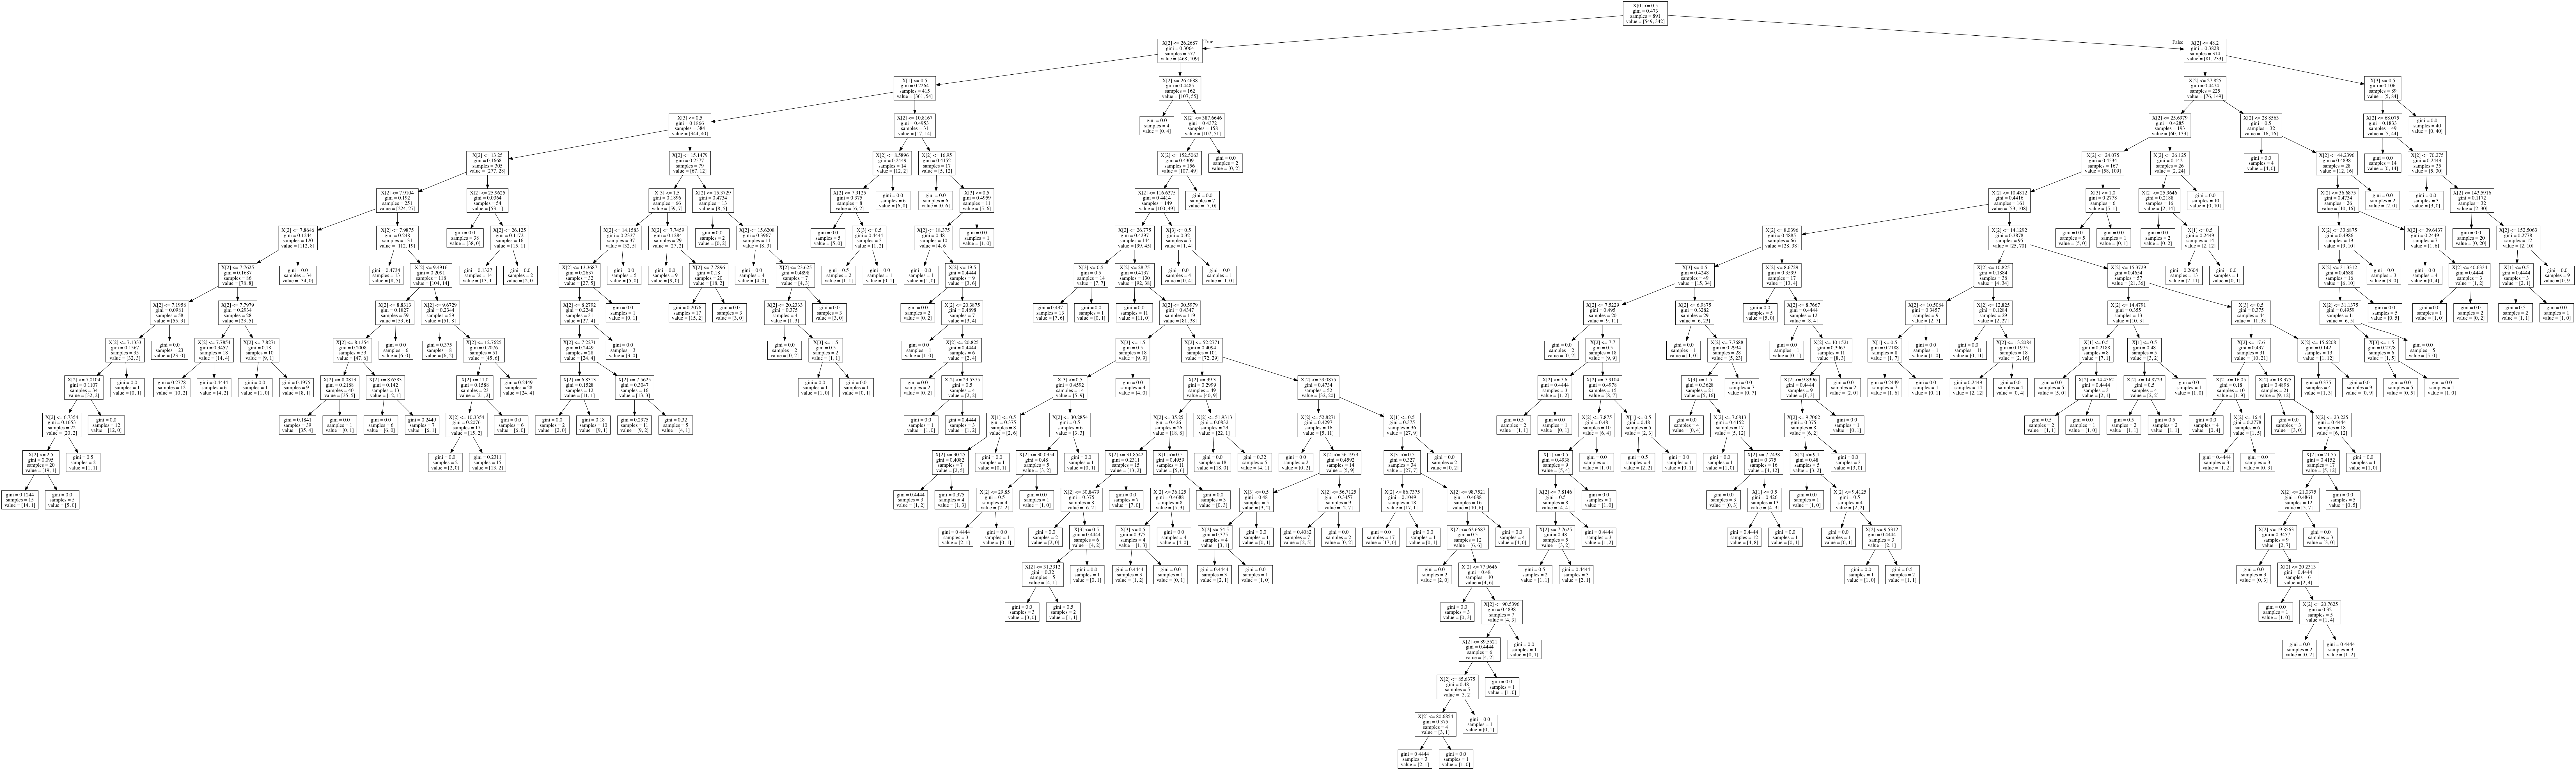

In [15]:
import pydotplus as pydot
from sklearn.externals.six import StringIO
from IPython.display import Image 
dotfile = StringIO()
tree.export_graphviz(eighth_tree, out_file=dotfile)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())

Pode-se notar que a árvore usa a feature 'Embarked' em várias etapas durante o caminho que ela percorre para tomar uma decisão. Isso pode explicar o motivo de a codificação ingênua ter funcionado bem, pois apesar de se ter introduzido uma semântica de ordem, o fato de a árvore realizar vários "cortes" nos valores dessa feature faz com que, na prática, ela identifique as diferentes categorias abrangidas pela feature.